## Importing libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.exceptions as px



## Exploring the data

In [134]:
df = pd.read_csv('train.csv')
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Duplicate Values

In [137]:
df.duplicated().sum()

0

### Missing values

In [138]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Handling Missing Values

In [139]:
df.dropna(subset=['Embarked'] , inplace=True)

In [140]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

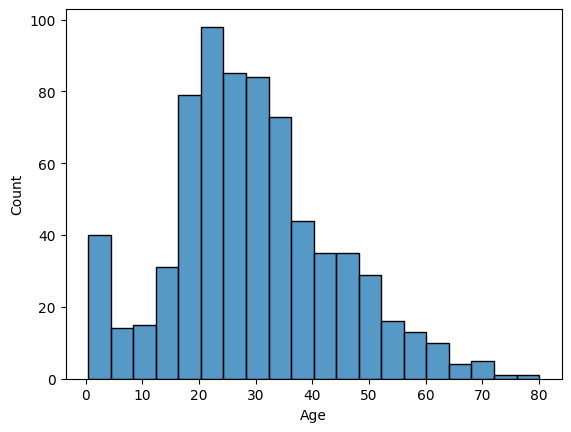

In [141]:
sns.histplot(df['Age'],bins=20)

In [142]:
df[df['Sex']=='female'].Age.median()


27.0

In [143]:
df[df['Sex']=='male'].Age.median()

29.0

In [144]:
print (df[df['Pclass']==1].Age.median())
print (df[df['Pclass']==2].Age.median())
print (df[df['Pclass']==3].Age.median())


37.0
29.0
24.0


In [145]:
df.groupby(['Pclass' , 'Sex'] )['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [146]:
#  imputation using KNN
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=2)
df[['Age']] =imputer.fit_transform(df[['Age']])


In [147]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Drop Columns


In [148]:
df.drop(labels=['Cabin' , 'PassengerId' , 'Name' , 'Ticket'] , axis=1 , inplace=True)

In [149]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [150]:

df.columns =df.columns.str.lower()

In [151]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
815,0,1,male,29.642093,0,0,0.0,S


In [152]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

In [153]:
 
df.survived.value_counts(normalize=True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

## EDA  

### Univariate Analysis

In [154]:
def explor_categorical (df,col):
  print (f'###{col}####')
  print (df[col].value_counts(normalize=True))
  sns.countplot(x=col, data=df)
  plt.show()
  

###pclass####
pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64


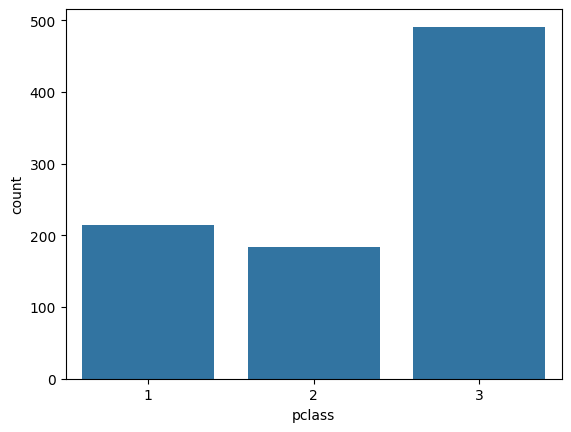

###sibsp####
sibsp
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: proportion, dtype: float64


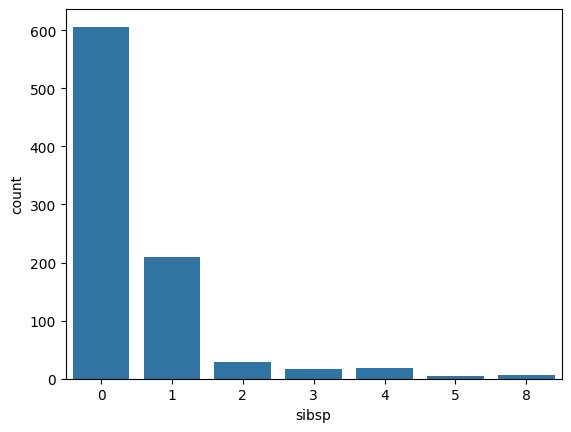

###parch####
parch
0    0.760405
1    0.132733
2    0.089989
5    0.005624
3    0.005624
4    0.004499
6    0.001125
Name: proportion, dtype: float64


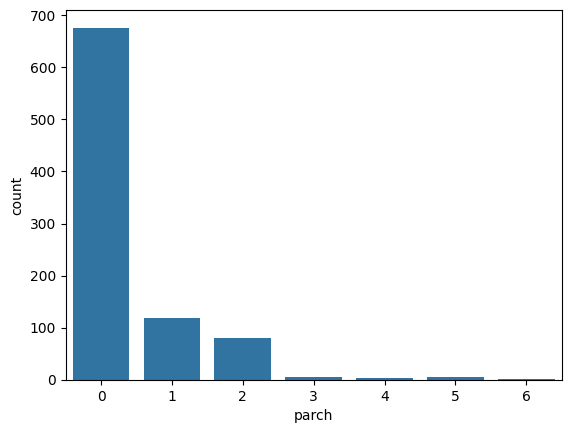

###embarked####
embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


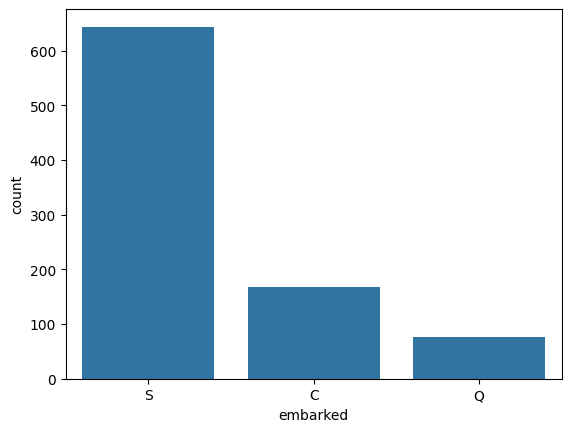

###sex####
sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64


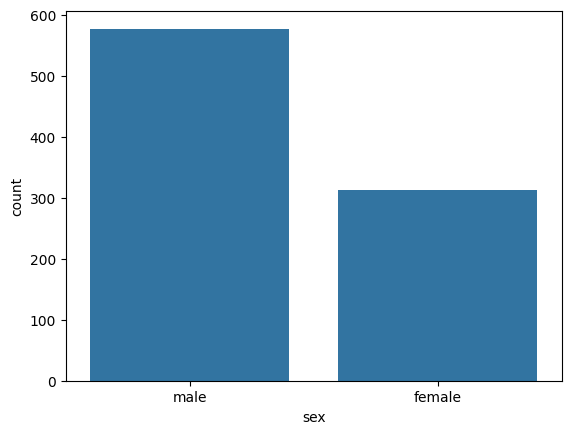

In [155]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
  explor_categorical(df,col)

### Bivariate analysis

In [156]:
def survival_rate (df,col):
  print (f'########{col}#########')
  print (df.groupby(col).survived.mean())
  sns.barplot(x=col , y = 'survived' ,data= df , ci=None) ;
  plt.axhline(df.survived.mean() , color = 'Black' , linestyle = '--') ;
  plt.show()
  
  

########pclass#########
pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




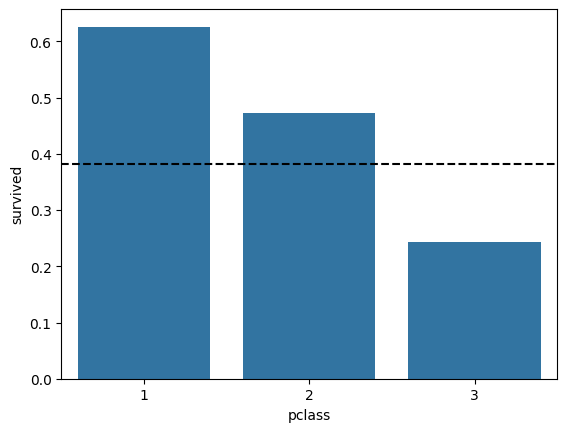

########sibsp#########
sibsp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




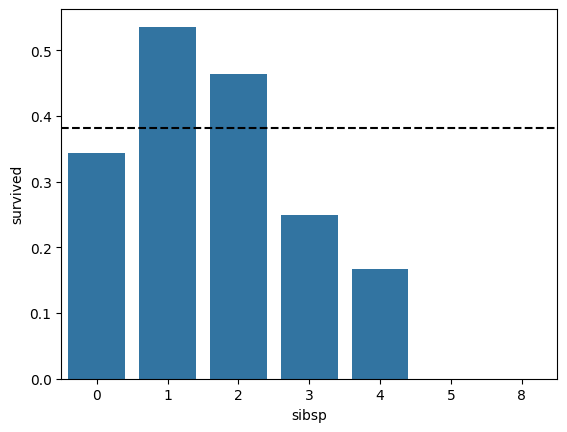

########parch#########
parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




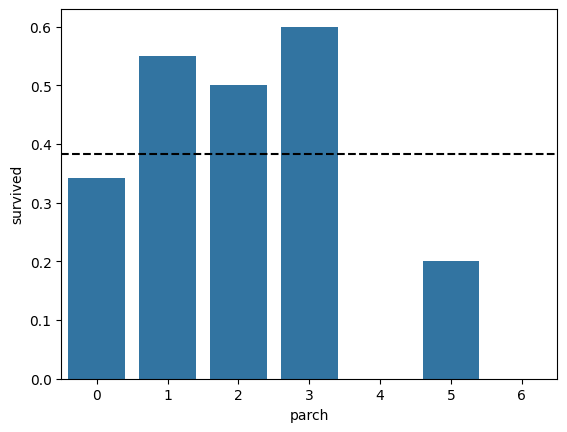

########embarked#########
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




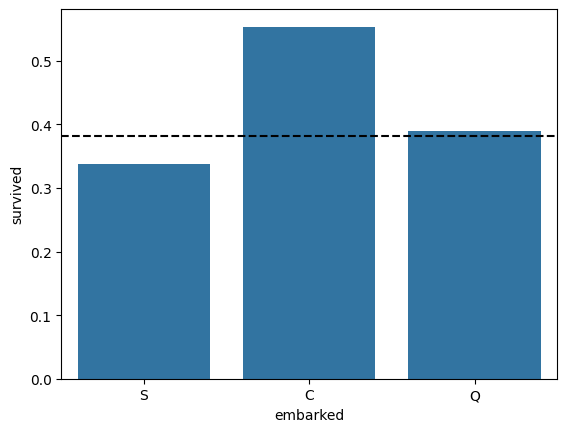

########sex#########
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




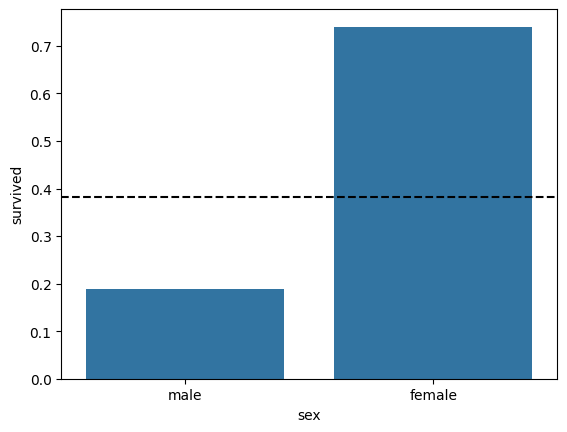

In [157]:
for col in ['pclass' , 'sibsp' , 'parch' , 'embarked' , 'sex']:
  survival_rate(df,col)

In [158]:
df_survived = df[df.survived==1]
df_died = df[df.survived == 0]

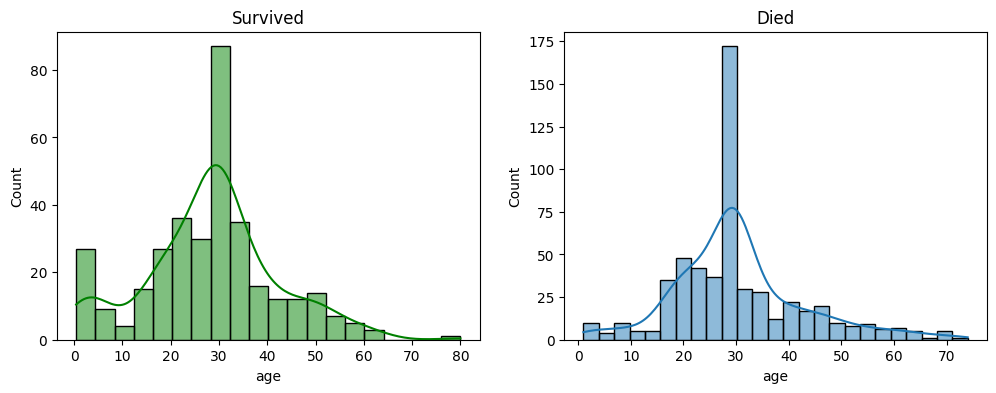

In [159]:
fig , ax = plt.subplots(1,2 , figsize = (12,4))
sns.histplot(data=df_survived , x='age',ax=ax[0],kde=True,color='Green')
sns.histplot(data=df_died, x='age',ax=ax[1],kde=True)
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

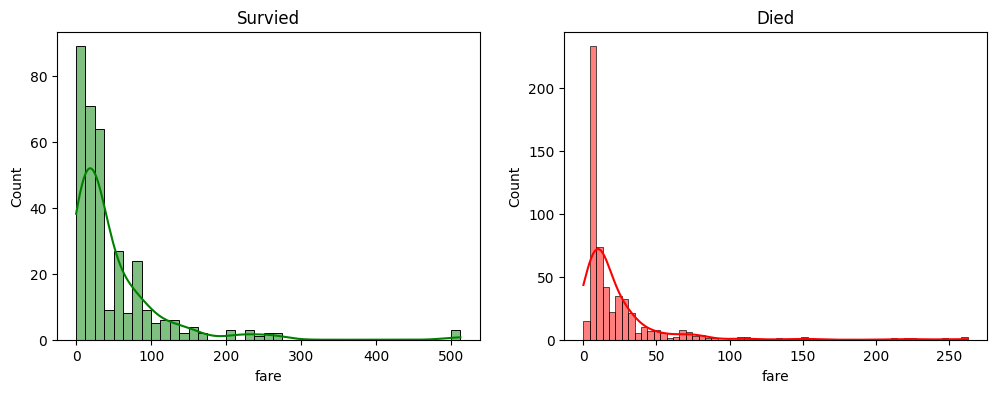

In [160]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=df_survived,x='fare', kde=True ,color = 'Green' , ax=ax[0])
sns.histplot(data=df_died,x='fare', kde=True ,color = 'Red' , ax=ax[1])
ax[0].set_title("Survied")
ax[1].set_title("Died")
plt.show()

In [161]:
df.describe()[['age','fare']]

,age,fare
count,889.000000,889.000000
mean,29.642093,32.096681
std,12.968346,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,29.642093,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


<Axes: xlabel='age'>

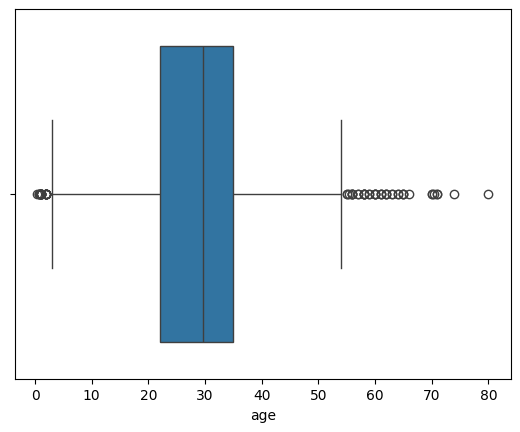

In [162]:
sns.boxplot(df,x='age')

<Axes: xlabel='fare'>

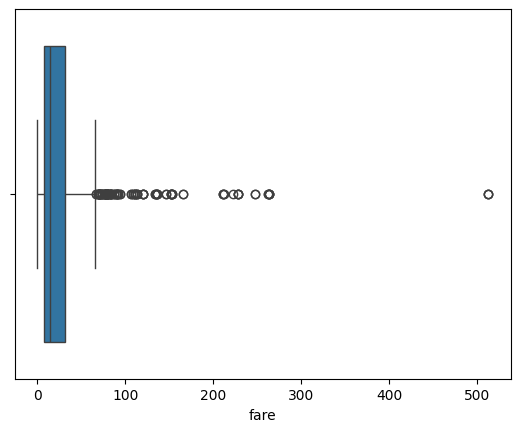

In [163]:
sns.boxplot(df,x='fare')

In [164]:
# many outliers in the fare

### Outliers Detection

In [165]:
def remove_outliers(df,col):
  q1= df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  return df[(df[col]>lower_bound) &( df[col]<upper_bound)]


In [166]:
remove_outliers(df,col='fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.642093,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.642093,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


<Axes: xlabel='fare'>

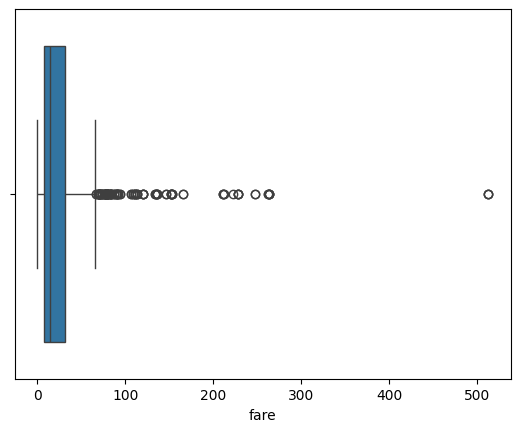

In [167]:
sns.boxplot(df,x='fare')

In [168]:
df.fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [169]:
#Split age into groups
df['age_group'] = pd.cut(df.age , bins=[0,22,27,37,82] , labels=['Child' , 'young','adult' , "senior"])

# Split Fare into groups
df['fare_group'] =pd.cut(df.fare , bins=[-0.99, 8 ,15,35,265], labels=['low' , 'medium', 'high', 'very_high'])


########age_group#########
age_group
Child     0.424242
young     0.405660
adult     0.355191
senior    0.370968
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




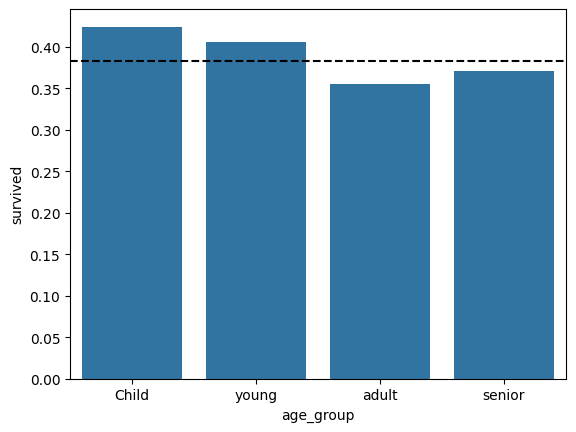

########fare_group#########
fare_group
low          0.215768
medium       0.285714
high         0.446809
very_high    0.611399
Name: survived, dtype: float64


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\2730841974.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




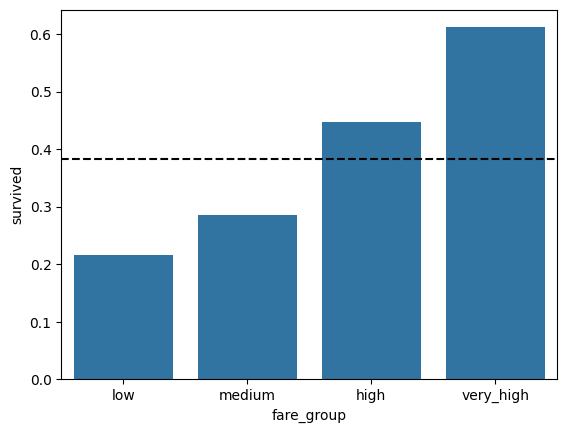

In [170]:
for col in ['age_group' , 'fare_group']:
  survival_rate(df,col)

### Multivariate Analysis

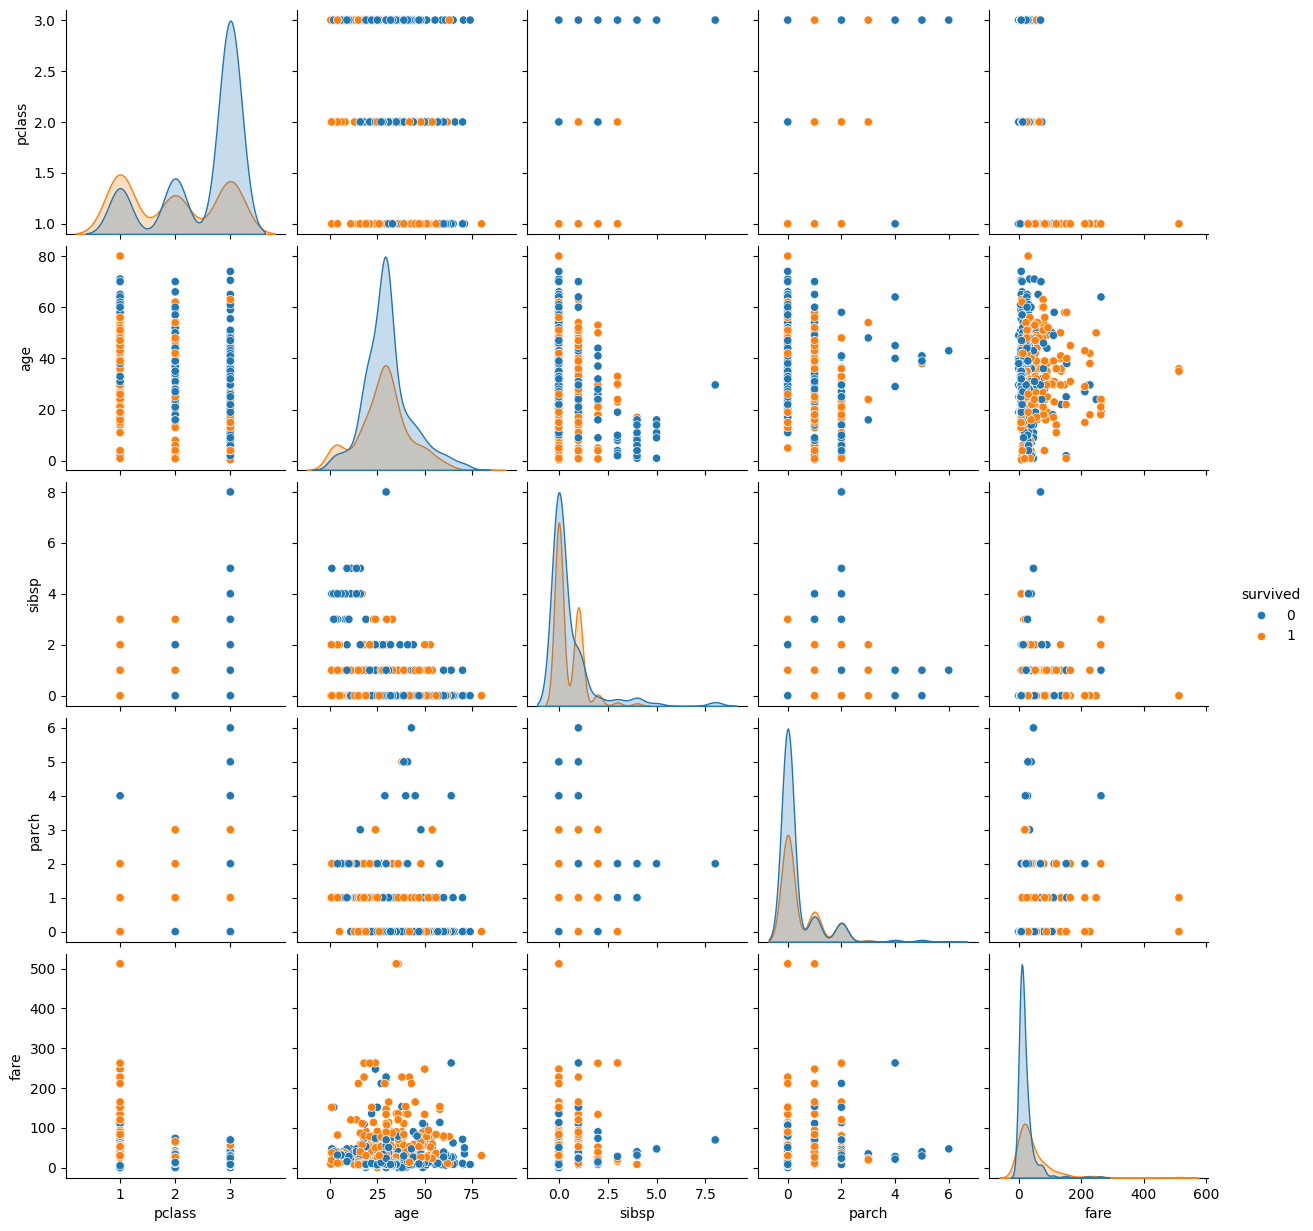

In [171]:
sns.pairplot(df,hue='survived')

<Axes: >

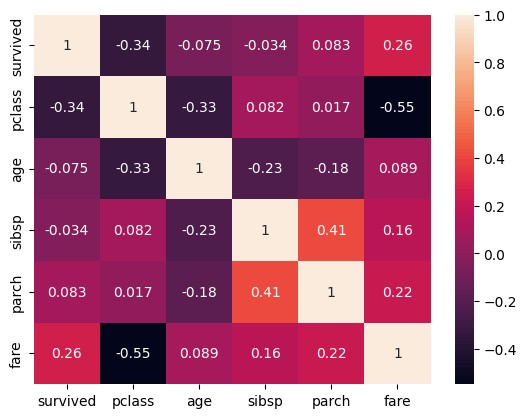

In [172]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

In [173]:
df.corr(numeric_only=True)['survived'].apply(lambda x :abs(x)).sort_values(ascending=False)

survived    1.000000
pclass      0.335549
fare        0.255290
parch       0.083151
age         0.074513
sibsp       0.034040
Name: survived, dtype: float64

C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\1987851495.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='pclass', ylabel='survived'>

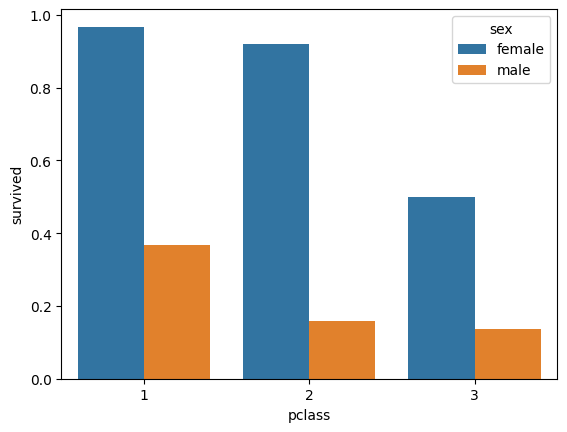

In [174]:
sns.barplot(x='pclass' , y='survived' , hue='sex' , data=df , ci=None)

C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\4076241342.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




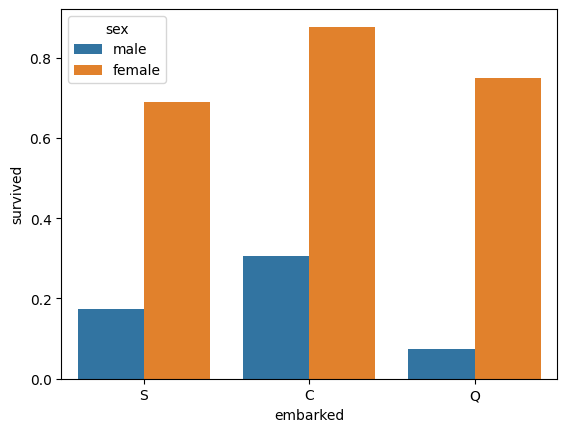

In [175]:
sns.barplot(df,x='embarked' , y='survived' , hue='sex' , ci=None);

C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\3170488917.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\3170488917.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\3170488917.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\3170488917.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\3170488917.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Compu Rotana\AppData\Local\Temp\ipykernel_7656\3170488917.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same ef

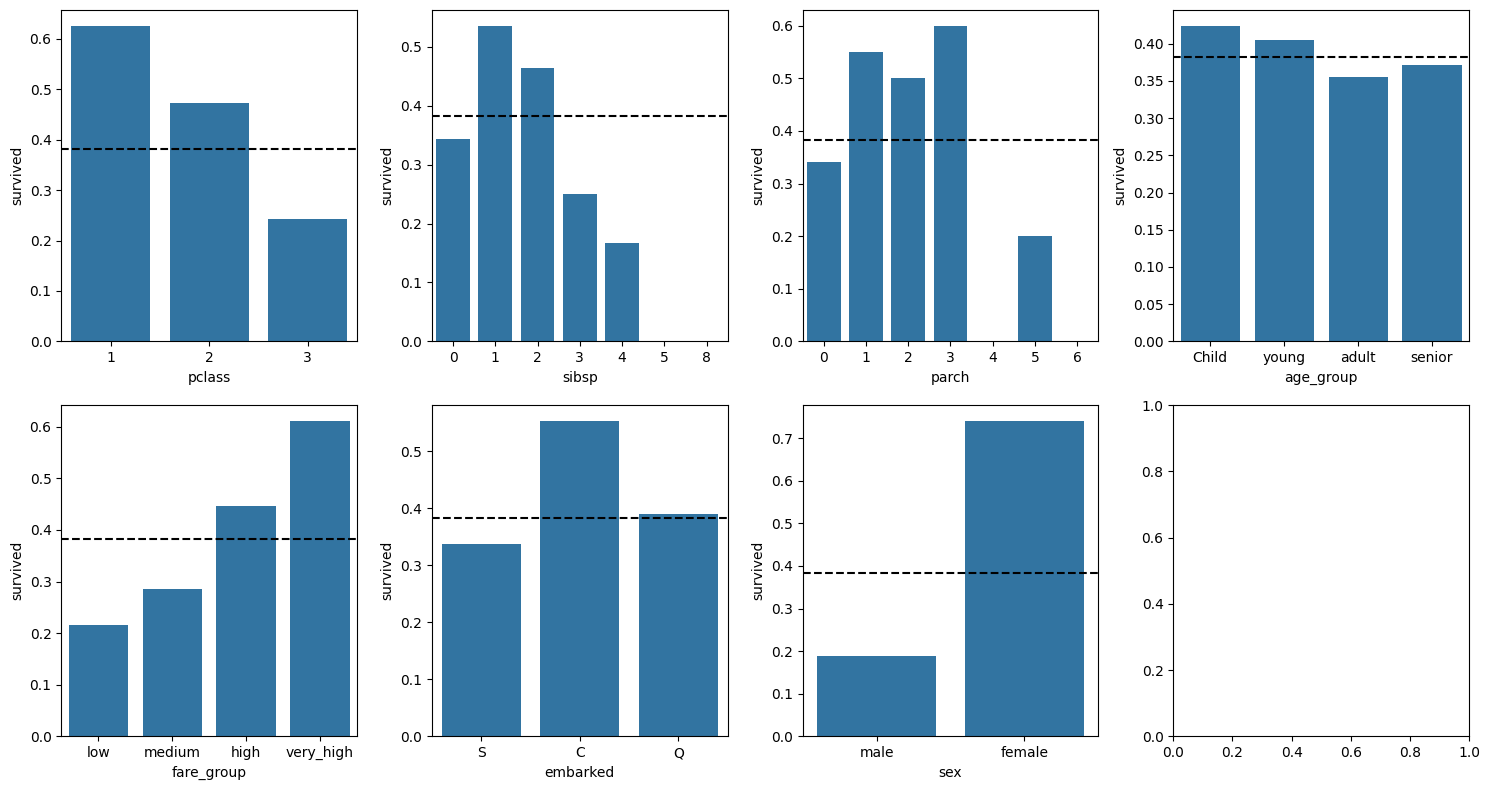

In [176]:
# 7Subplots
fig , ax = plt.subplots(2,4 , figsize=(15,8))
for i , col in enumerate(['pclass' , 'sibsp' , 'parch' , 'age_group' , 'fare_group', 'embarked', 'sex']):
  sns.barplot(x=col , y='survived' , data=df, ci=None ,ax=ax[i//4,i%4])
  ax[i//4,i%4].axhline(df.survived.mean(),color='Black' , linestyle='--')
plt.tight_layout()
plt.show()

In [177]:
X = df.drop(columns='survived',axis=1)
y= df['survived']

## Model

In [178]:
from sklearn.model_selection import train_test_split , GridSearchCV
X_train ,X_test,y_train,y_test = train_test_split(X,y ,random_state=42 , test_size=0.2)

In [179]:
X_train.shape , X_test.shape , y_test.shape , y_train.shape

((711, 9), (178, 9), (178,), (711,))

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [181]:
num_cols = ['age', 'sibsp', 'parch', 'fare', 'pclass'] 
cat_cols = ['sex', 'embarked']


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())                    
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore',  sparse_output=False)) 
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [182]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy (val):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy (val): 0.7752808988764045
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [186]:
num_cols = [ 'sibsp', 'parch',  'pclass'] 
cat_cols = ['sex', 'embarked','age_group','fare_group']


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())                    
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore',  sparse_output=False)) 
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [187]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy (val):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy (val): 0.8033707865168539
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178

